In [3]:
import pandas as pd
movies = pd.read_csv('fandango_score_comparison.csv')
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


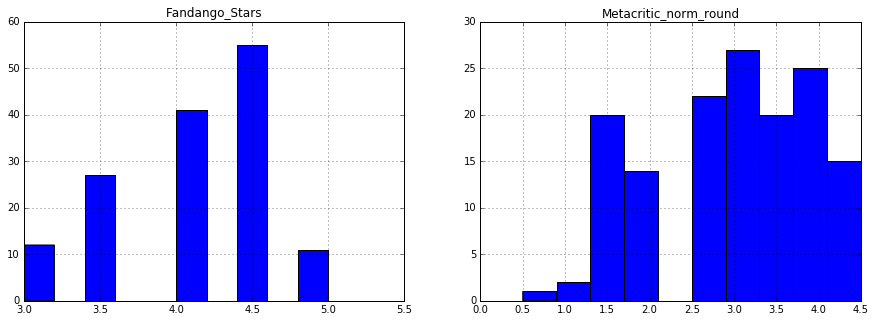

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15, 5))
ax = []
ax.append(fig.add_subplot(1,2,1))
ax.append(fig.add_subplot(1,2,2))
movies['Fandango_Stars'].hist(ax=ax[0]); ax[0].set_title('Fandango_Stars')
movies['Metacritic_norm_round'].hist(ax=ax[1]); ax[1].set_title('Metacritic_norm_round')

In [10]:
movies['Fandango_Stars'].describe()

count    146.000000
mean       4.089041
std        0.540386
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [11]:
movies['Metacritic_norm_round'].describe()

count    146.000000
mean       2.972603
std        0.990961
min        0.500000
25%        2.125000
50%        3.000000
75%        4.000000
max        4.500000
Name: Metacritic_norm_round, dtype: float64

The Fandango reviews are clearly skewed on the high end. This lines up with their incentive to sell movie tickets.

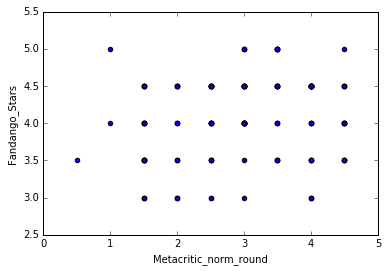

In [12]:
movies.plot(kind='scatter',x='Metacritic_norm_round',y='Fandango_Stars')

In [20]:
import numpy as np
movies['fm_diff'] = np.absolute(movies['Fandango_Stars'] - movies['Metacritic_norm_round'])
movies = movies.sort_values(by=['fm_diff'])
movies.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,...,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0,0.0
39,Maps to the Stars (2015),60,46,67,5.8,6.3,3.5,3.1,3.00,2.30,...,3.0,2.5,3.5,3.0,3.0,46,22440,35,0.4,0.0
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,4.0,3.6,4.70,3.50,...,4.5,3.5,4.0,3.5,3.5,14,1151,281,0.4,0.0
117,Testament of Youth (2015),81,79,77,7.9,7.3,4.0,3.9,4.05,3.95,...,4.0,4.0,4.0,4.0,3.5,15,5495,127,0.1,0.0
111,Into the Woods (2014),71,50,69,6.1,6.0,3.5,3.4,3.55,2.50,...,3.5,2.5,3.5,3.0,3.0,307,81679,13055,0.1,0.0


In [22]:
import scipy.stats as stats
stats.pearsonr(movies['Fandango_Stars'],movies['Metacritic_norm_round'])

(0.17844919073895918, 0.031161516228523815)

The r value shows a slight positive corellation between Fandango and metacritic, however, there are significant differences between the two review sites. 

Now, I'll perform linear regression to show what a predictor for fandango based on the metacritic scores would look like.

In [31]:
m,b,r,p,stderr = stats.linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])
#a movie with a 3.0 in metacritic normalized should receive a fandango ranking of...
fpredictor = lambda x: m*x+b
fpredictor(3.0)

4.0917071528212032

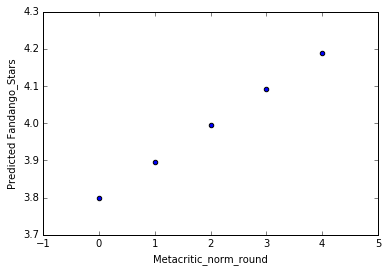

In [35]:
x = [x for x in range(5)]
y = [fpredictor(_x) for _x in x]
plt.scatter(x=x,y=y)
plt.xlabel('Metacritic_norm_round')
plt.ylabel('Predicted Fandango_Stars')
plt.show()